# [pytd: Treasure Data Driver for Python](https://github.com/treasure-data/pytd)

## 事前準備

In [1]:
!pip install pytd

     |████████████████████████████████| 92kB 6.1MB/s 


In [0]:
%load_ext pytd.pandas_td.ipython

In [0]:
%matplotlib inline
import os
import pandas as pd

## TD API KEYを入力

In [4]:
import os
from getpass import getpass

os.environ['TD_API_KEY'] = getpass('Enter TD API KEY ')

Enter TD API KEY ··········


## テーブル定義の確認

In [0]:
%%td_presto oksky_chat -o df
DESC pageviews

In [6]:
df

,Column,Type,Extra,Comment
0,td_platform,varchar,keyName=td_platform,
1,td_user_agent,varchar,keyName=td_user_agent,
2,td_path,varchar,keyName=td_path,
3,td_version,varchar,keyName=td_version,
4,td_client_id,varchar,keyName=td_client_id,
5,timezone,varchar,keyName=timezone,
6,td_viewport,varchar,keyName=td_viewport,
7,td_referrer,varchar,keyName=td_referrer,
8,td_os,varchar,keyName=td_os,
9,td_host,varchar,keyName=td_host,


## 1. サイト全体

In [0]:
%%td_presto oksky_chat -o df
SELECT 
  COUNT(*)
FROM
  pageviews
WHERE
  TD_TIME_RANGE(time,
    '2020-01-01',
    '2020-02-01',
    'JST')
  AND app_subdomain = 'nu-chat'

In [8]:
df

,_col0
0,6467179


## 2. ディメンジョン：ページ

In [0]:
%%td_presto oksky_chat -o df
SELECT
    td_path,
    COUNT(1) AS pv
FROM pageviews
WHERE
TD_TIME_RANGE(time,
    '2020-01-01',
    '2020-02-01',
    'JST')
AND app_subdomain = 'nu-chat'
GROUP BY td_path
ORDER BY pv DESC

In [10]:
df

,td_path,pv
0,/jp/c/c0,380625
1,/jp/c/c1010,369443
2,/jp/c/c1020,367853
3,/jp/men.aspx,257424
4,/jp/,251313
...,...,...
50494,/jp/c/c0_b7006_r2110,1
50495,/jp/i/etlm42/,1
50496,/jp/c/c2010_r2319_i1,1
50497,/jp/c/c1010_r0530,1


### 先頭10件

In [11]:
df.head(10)

,td_path,pv
0,/jp/c/c0,380625
1,/jp/c/c1010,369443
2,/jp/c/c1020,367853
3,/jp/men.aspx,257424
4,/jp/,251313
5,/jp/women.aspx,187384
6,/jp/goods/goods.aspx,141427
7,/jp/snap/snapdetail.aspx,136353
8,/jp/cart/cart.aspx,116220
9,/jp/ranking/rankinglist.aspx,115720


## 最後10件

In [12]:
df.tail(10)

,td_path,pv
50489,/jp/g/g6698222007_r1210,1
50490,/jp/c/c0_b7777_r26,1
50491,/jp/g/g6759111004_r1330_y120,1
50492,/jp/c/c0_r2010_b5805,1
50493,/jp/g/g6689220011_r1112_u668922001140360,1
50494,/jp/c/c0_b7006_r2110,1
50495,/jp/i/etlm42/,1
50496,/jp/c/c2010_r2319_i1,1
50497,/jp/c/c1010_r0530,1
50498,"/jp/c/c2010_r1011,1012,1013,1014_i0",1


### describe（統計情報）
*   count	データの個数を表します。
*   mean	数値データの平均を表します。
*   std	数値データの標準偏差を表します。
*   min	最小値を表します。
*   max	最大値を表します。
*   25%,50%,75%	四分位数を表します。(区切る部分はpercentiles引数で変更可能)	


In [13]:
df['pv'].describe()

count     50499.000000
mean        128.065486
std        3640.684440
min           1.000000
25%           1.000000
50%           4.000000
75%          15.000000
max      380625.000000
Name: pv, dtype: float64

### グラフ表示

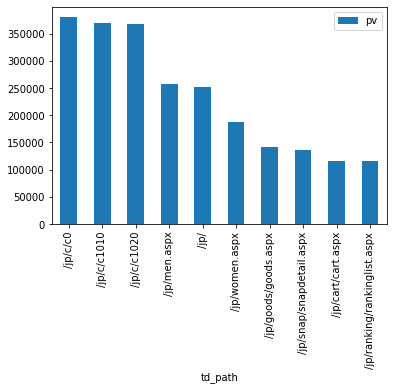

In [14]:
df.head(10).plot(x='td_path', kind='bar')

### CSVダウンロード

In [0]:
from google.colab import files
df.to_csv("output.csv")
files.download('output.csv') 

## 3. ディメンジョン：日付

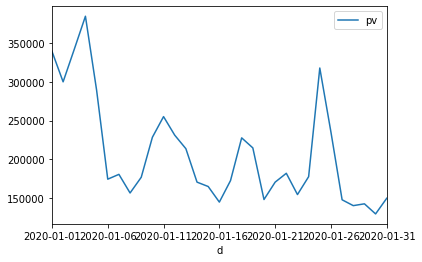

In [16]:
%%td_presto oksky_chat --plot
SELECT 
  TD_TIME_FORMAT(time,'yyyy-MM-dd','JST') AS d,
  COUNT(1) AS pv
FROM pageviews
WHERE
TD_TIME_RANGE(time,
    '2020-01-01',
    '2020-02-01',
    'JST')
AND app_subdomain = 'nu-chat'
GROUP BY
TD_TIME_FORMAT(time,'yyyy-MM-dd','JST')
ORDER BY
  d

## 4. ディメンジョン：ページ，日付

In [0]:
%%td_presto oksky_chat -o df
SELECT 
  TD_TIME_FORMAT(time,'yyyy-MM-dd','JST') AS d,
  td_path,
  COUNT(1) AS pv
FROM pageviews
WHERE
TD_TIME_RANGE(time,
    '2020-01-01',
    '2020-02-01',
    'JST')
AND app_subdomain = 'nu-chat'
GROUP BY
  TD_TIME_FORMAT(time,'yyyy-MM-dd','JST'),
  td_path
ORDER BY
  d,
  td_path DESC

In [18]:
df.head(10)

,d,td_path,pv
0,2020-01-01,/jp/women.aspx,10991
1,2020-01-01,/jp/topic/topiclist.aspx,69
2,2020-01-01,/jp/topic/topic.aspx,15
3,2020-01-01,/jp/t/t1191/,297
4,2020-01-01,/jp/t/t1191,42
5,2020-01-01,/jp/t/t1188/,3
6,2020-01-01,/jp/t/t1186/,1
7,2020-01-01,/jp/t/t1184/,2
8,2020-01-01,/jp/t/t1165/,1
9,2020-01-01,/jp/t/t1105/,220
